# Logistic Regression on Loan Data - Example 1
We are going to experiment with logistic regression using the data available from the <a href="https://www.lendingclub.com/info/download-data.action">Lending Club Corporation</a>. The company provides files containing complete loan data for all loans issued through a certain time period, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information.

We are going to use a small subset of the available data which were previously preprocessed.

As the very first step, we load all the relevant libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

Then, we load the data.

In [2]:
loans = pd.read_csv('LoansData01.csv')

In [3]:
target = 'safe_loans'
features = loans.columns[loans.columns!=target]

features

Index(['sub_grade_num', 'short_emp', 'emp_length_num', 'dti',
       'payment_inc_ratio', 'delinq_2yrs', 'delinq_2yrs_zero',
       'inq_last_6mths', 'last_delinq_none', 'last_major_derog_none',
       'open_acc', 'pub_rec', 'pub_rec_zero', 'revol_util',
       'total_rec_late_fee', 'int_rate', 'total_rec_int', 'annual_inc',
       'funded_amnt', 'funded_amnt_inv', 'installment', 'num_term',
       'grade_num', 'loan_amnt'],
      dtype='object')

From the data dictionary available on the <a href="https://www.lendingclub.com/info/download-data.action">Lending Club Corporation</a> website, we have the description of the variables: 

- <b>sub_grade_num</b>, the sub-grade of the loan as a number from 0 to 1
- <b>short_emp</b>, one year or less of employment
- emp_length_num, number of years of employment
- <b>dti</b>, debt to income ratio
- <b>payment_inc_ratio</b>, ratio of the monthly payment to income
- <b>delinq_2yrs</b>, number of delinquincies
- <b>delinq_2yrs_zero</b>, no delinquincies in last 2 years
- <b>inq_last_6mths</b>, number of creditor inquiries in last 6 months
- <b>last_delinq_none</b>, has borrower had a delinquincy
- <b>last_major_derog_none</b>, has borrower had 90 day or worse rating
- <b>open_acc</b>, number of open credit accounts
- <b>pub_rec</b>, number of derogatory public records
- <b>pub_rec_zero</b>, no derogatory public records
- <b>revol_util</b>, percent of available credit being used
- <b>total_rec_late_fee</b>, total late fees received to day
- <b>int_rate</b>, interest rate of the loan
- <b>total_rec_int</b>, interest received to date
- <b>annual_inc</b>,  annual income of borrower
- <b>funded_amnt</b>, amount committed to the loan
- <b>funded_amnt_inv</b>, amount committed by investors for the loan
- <b>installment</b>, monthly payment owed by the borrower
- <b>num_term</b>, number of payments on the loan. Values are in months and can be either 36 or 60
- <b>grade_num</b>, LC assigned loan grade as a number
- <b>loan_amnt</b>, the listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

The target variable (the class) is <b>safe_loans</b> that is +1 if the loan is safe -1 if it is risky

The input variables x are the columns corresponding to the features, the output variable y is the column corresponding to the target variable.

In [4]:
x = loans[features]
y = loans[target]

First we apply plain logistic regression without regularization (thus $\alpha$ is zero). The Scikit-learn function does not allow to specify $\alpha$ but it uses a parameter C=1/$\alpha$. Accordingly, to have no regularization we need to specify a huge value of C.

In [5]:
simple_logistic = linear_model.LogisticRegression(C=10e10)
simple_logistic.fit(x,y)

LogisticRegression(C=100000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

We evaluate the model using cross validation.

In [6]:
simple_eval = model_selection.cross_val_score(simple_logistic, x, y, cv=10)
print("Simple Logistic Regression\t%3.2f\t%3.2f" % (np.average(simple_eval), np.std(simple_eval)))

Simple Logistic Regression	0.63	0.05


We now apply L1 and L2 regularization with default parameters.

In [7]:
logistic_l1 = linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(x,y)
eval_l1 = model_selection.cross_val_score(logistic_l1, x, y, cv=10)

logistic_l2 = linear_model.LogisticRegression(penalty='l2')
logistic_l2.fit(x,y)
eval_l2 = model_selection.cross_val_score(logistic_l2, x, y, cv=10)

In [8]:
print("Logistic Regression (L1)  \t%3.2f\t%3.2f" % (np.average(eval_l1), np.std(eval_l1)))
print("Logistic Regression (L2)  \t%3.2f\t%3.2f" % (np.average(eval_l2), np.std(eval_l2)))

Logistic Regression (L1)  	0.63	0.07
Logistic Regression (L2)  	0.64	0.05


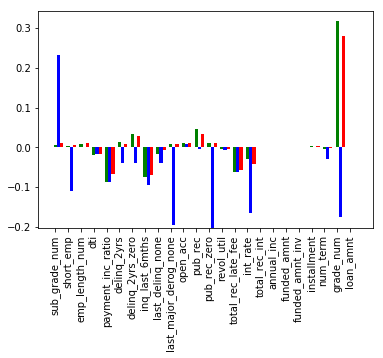

In [9]:
plt.bar(np.arange(len(features)), simple_logistic.coef_[0], color='green',width=0.25);
plt.bar(np.arange(len(features))+0.25, logistic_l1.coef_[0], color='blue',width=0.25);
plt.bar(np.arange(len(features))+0.50, logistic_l2.coef_[0], color='red',width=0.25);
plt.xticks(range(len(features)), features, rotation=90);

## Question
- Which method performs best?
- Do you see any sign of overfitting?
- Is this a good result
- How can we modify this procedure to select the best $\alpha$ for L1 and L2 regularization?